In [73]:
import pandas as pd

In [74]:
# data processing and visualization
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# algorithm

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
# training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [75]:
train = pd.read_csv("/Users/collinpope/Downloads/house-prices-advanced-regression-techniques 2/train.csv")

In [76]:
test = pd.read_csv("/Users/collinpope/Downloads/house-prices-advanced-regression-techniques 2/test.csv")

In [77]:
def set_pandas_options() -> None:
    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()

In [78]:
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [79]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
train.describe ()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [81]:
import numpy as np

In [82]:
train.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
5     False       False     False        False    False   False   True   
6     False       False     False        False    False   False   True   
7     False       False     False         True    False   False   True   
8     False       False     False        False    False   False   True   
9     False       False     False        False    False   False   True   
10    False       False     False        False    False   False   True   
11    False       False     False        False    False   False   True   
12    False       False     False         True    False   False   True   
13    False       False     False        False    False   False   True   
14    False       False     False         True    False   False   True   
15    False       False     False        False    False   False   True   
16    False       False     False         True    False   False   True   
17    False       False     False        False    False   False   True   
18    False       False     False        False    False   False   True   
19    False       False     False        False    False   False   True   
20    False       False     False        False    False   False   True   
21    False       False     False        False    False   False  False   
22    False       False     False        False    False   False   True   
23    False       False     False        False    False   False   True   
24    False       False     False         True    False   False   True   
25    False       False     False        False    False   False   True   
26    False       False     False        False    False   False   True   
27    False       False     False        False    False   False   True   
28    False       False     False        False    False   False   True   
29    False       False     False        False    False   False   True   
30    False       False     False        False    False   False  False   
31    False       False     False         True    False   False   True   
32    False       False     False        False    False   False   True   
33    False       False     False        False    False   False   True   
34    False       False     False        False    False   False   True   
35    False       False     False        False    False   False   True   
36    False       False     False        False    False   False   True   
37    False       False     False        False    False   False   True   
38    False       False     False        False    False   False   True   
39    False       False     False        False    False   False   True   
40    False       False     False        False    False   False   True   
41    False       False     False        False    False   False   True   
42    False       False     False         True    False   False   True   
43    False       False     False         True    False   False   True   
44    False       False     False        False    False   False   True   
45    False       False     False        False    False   False   True   
46    False       False     False        False    False   False   True   
47    False       False     False        False    False   False   True   
48    False       False     False        False    False   False   True   
49    False       False     False        False    False   False   True   
50    False       False     False         True    False   False   True   
51    False       False     False        False    False   False   True   
52    False       False     False        False    False   False   True   
53    False  

In [83]:
train.Alley = train.Alley.fillna(0)


In [84]:
train.LotFrontage = train.LotFrontage.fillna(0)


In [85]:
train.PoolQC = train.PoolQC.fillna(0)

In [86]:
train.Fence = train.Fence.fillna(0)


In [87]:
train.MiscFeature = train.MiscFeature.fillna(0)


In [88]:
train.BsmtQual = train.BsmtQual.fillna(0)

In [89]:
train.BsmtCond = train.BsmtCond.fillna(0)

In [90]:
train.BsmtExposure = train.BsmtExposure.fillna(0)

In [91]:
train.BsmtFinType1 = train.BsmtFinType1.fillna(0)
train.BsmtFinType2 = train.BsmtFinType2.fillna(0)
train.FireplaceQu = train.FireplaceQu.fillna(0)
train.GarageType = train.GarageType.fillna(0)
train.GarageFinish = train.GarageFinish.fillna(0)
train.GarageQual = train.GarageQual.fillna(0)



In [92]:
train['CentralAir1'] = train.CentralAir.map({'N':0,'Y':1})

In [93]:
train['CentralAir1'] = train.CentralAir.map({'N':0,'Y':1})

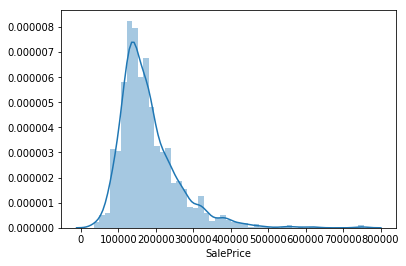

In [94]:
sns.distplot(train.SalePrice)

In [95]:
y = train["SalePrice"]
y = np.log(y+1)

In [96]:
print (y)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
30      10.596660
31      11.914055
32      12.100162
33      12.016733
34      12.533580
35      12.641100
36      11.884496
37      11.938200
38      11.599112
39      11.314487
40      11.982935
41      12.043560
42      11.877576
43      11.777219
44      11.856522
45      12.675767
46      12.387089
47      12.428019
48      11.635152
49      11.751950
50      12.083911
51      11.648339
52      11.608245
53      12.861001
54      11.775297
55      12

In [97]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Drop Outliers

In [98]:
train = train.drop([30, 88, 142, 277, 328, 410, 462, 495, 523, 533, 581, 588, 628, 632, 681, 688, 710, 714, 728, 774, 812, 874, 898, 916, 968, 970, 1181, 1182, 1298, 1324, 1383, 1423, 1432, 1453])
y = train["SalePrice"]
y = np.log(y+1)

In [99]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
%matplotlib inline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1459
Data columns (total 82 columns):
Id               1426 non-null int64
MSSubClass       1426 non-null int64
MSZoning         1426 non-null object
LotFrontage      1426 non-null float64
LotArea          1426 non-null int64
Street           1426 non-null object
Alley            1426 non-null object
LotShape         1426 non-null object
LandContour      1426 non-null object
Utilities        1426 non-null object
LotConfig        1426 non-null object
LandSlope        1426 non-null object
Neighborhood     1426 non-null object
Condition1       1426 non-null object
Condition2       1426 non-null object
BldgType         1426 non-null object
HouseStyle       1426 non-null object
OverallQual      1426 non-null int64
OverallCond      1426 non-null int64
YearBuilt        1426 non-null int64
YearRemodAdd     1426 non-null int64
RoofStyle        1426 non-null object
RoofMatl         1426 non-null object
Exterior1st      1426 non

In [101]:
train.GarageYrBlt = train.GarageYrBlt.fillna(0)
train.GarageCond = train.GarageCond.fillna(0)
train.MasVnrArea = train.MasVnrArea.fillna(0)


In [102]:
X = train[['OverallQual', 'OverallCond', 'YearBuilt',
               'YearRemodAdd', 'BsmtFinSF1','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','MiscVal','PoolArea','ScreenPorch']]
y = train['SalePrice']



In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [104]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
predictions = lm.predict(X_test)

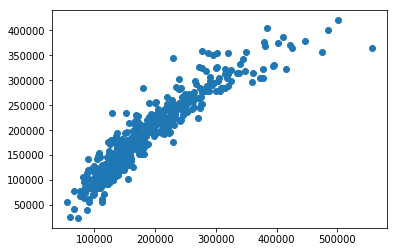

In [107]:
plt.scatter(y_test,predictions)

In [135]:
train.to_csv(r'/Users/collinpope/Desktop/output.csv')



In [123]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv')

In [138]:
print (predictions)


[297958.66344981 328043.45393621 128700.56019311  71232.29219052
  92055.02308609 154053.87865657  42731.43165339 157303.56834634
 107722.49313115 175366.30969308 136415.32052935 126980.01279392
 151864.44402811 212131.09657017  72487.85899593 109510.95692193
 218589.92603827 155781.73373001 254025.98123266 255619.77485804
 281726.01488458 220766.37638363 147628.49710982 174631.68921564
 305638.6168613  270939.77348082 306599.04599271 137072.77452008
 156105.0458936   77437.94332377 108324.24442103  96668.63939134
  96042.41107081 106076.0351162  168485.743154   116424.10809003
 289605.56722324 111629.96580073 118923.59493155 121642.62584387
 285849.66150322 250713.26840969 150613.96774211 153242.25073863
 185607.32902713 177619.38286621 169420.21197706 194671.29670212
 168397.90956794 211398.22656996 164921.85876986 145431.15786806
 167676.8862449  151132.76816772 184074.34352436  94186.65267915
 149419.86935579 233617.6485632  100315.78066433 345404.06914456
  99322.7457897   92199.2

In [124]:
np.save('outfile_name', predictions)

next model (logistic)

In [128]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
import pprint


In [129]:

def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)

def pred_values(theta, X, hard=True):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [133]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]

In [ ]:
shape = X.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)